In [1]:
#Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [3]:
#Загрузка данных
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_10236\112359951.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


In [4]:
#Первые 5 строк данных
display(flights.head(5))

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(airlines.head(5))

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
display(airports.head(5))

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


# Разведочный анализ данных(EDA)
Проверим, есть ли незаполненные столбцы:

In [8]:
print('Пропущенные значения')
print(airlines.isnull().sum())

Пропущенные значения
IATA_CODE    0
AIRLINE      0
dtype: int64


Пропущенных значений не оказалось

In [10]:
print('\t\tПроцент пропущенных значений')
print(airports.isnull().mean()*100)

		Процент пропущенных значений
IATA_CODE    0.000000
AIRPORT      0.000000
CITY         0.000000
STATE        0.000000
COUNTRY      0.000000
LATITUDE     0.931677
LONGITUDE    0.931677
dtype: float64


Тут есть пропуски, их довольно мало (<1%), поэтому можно заменить данные. Для начала посмотрим на распределение

<Axes: xlabel='LONGITUDE', ylabel='Count'>

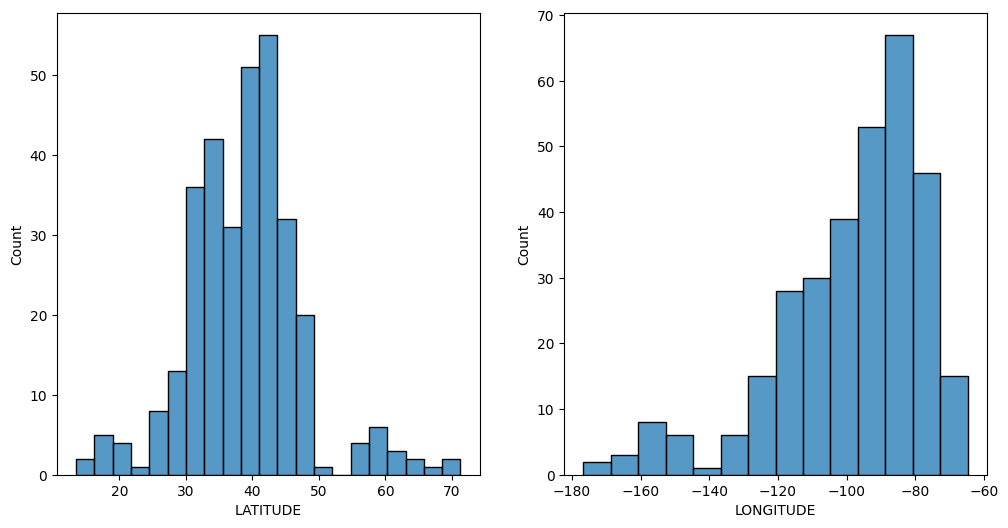

In [12]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(airports['LATITUDE'])
plt.subplot(1,2,2)
sns.histplot(airports['LONGITUDE'])

Заменим на среднее значение и вновь посмотрим на распределение

<Axes: xlabel='LONGITUDE', ylabel='Count'>

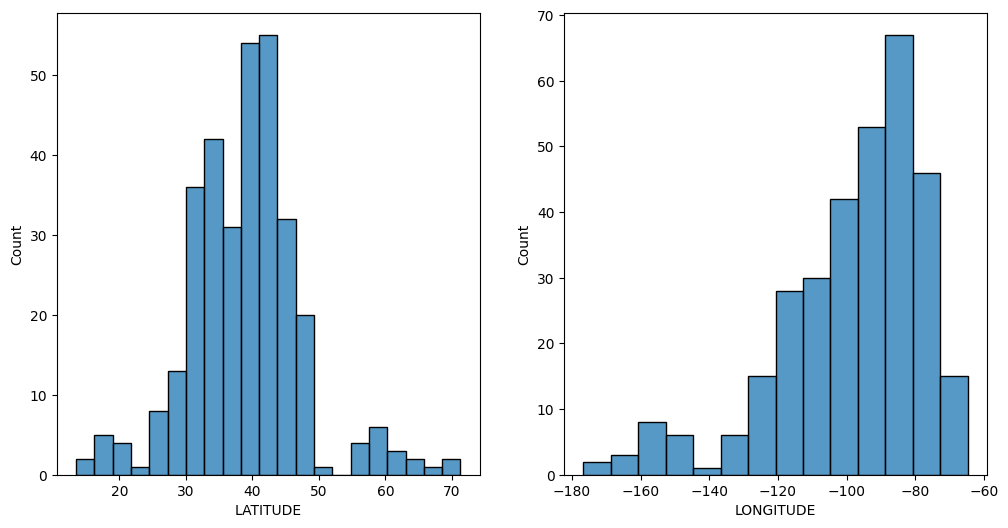

In [14]:
airports.fillna({
    'LATITUDE': airports['LATITUDE'].mean(),
    'LONGITUDE': airports['LONGITUDE'].mean()
}, inplace=True)
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(airports['LATITUDE'])
plt.subplot(1,2,2)
sns.histplot(airports['LONGITUDE'])

Оно не сильно поменялось

In [16]:
print('\t\tПроцент пропущенных значений')
print(flights.isnull().mean()*100)

		Процент пропущенных значений
YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAF

Удалим столбцы, в которых пропусков больше 80%

In [18]:
missing_percent = (flights.isnull().sum() / len(flights)) * 100
flights_clean = flights.drop(columns = missing_percent[missing_percent > 80].index)

Удалим строки с пропусками во времени отправления

In [20]:
flights_clean = flights_clean.dropna(subset=['DEPARTURE_DELAY', 'DEPARTURE_TIME'])

In [21]:
print('\t\tПроцент пропущенных значений')
print(flights_clean.isnull().mean()*100)

		Процент пропущенных значений
YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.000000
DEPARTURE_DELAY        0.000000
TAXI_OUT               0.050480
WHEELS_OFF             0.050480
SCHEDULED_TIME         0.000105
ELAPSED_TIME           0.329989
AIR_TIME               0.329989
DISTANCE               0.000000
WHEELS_ON              0.110938
TAXI_IN                0.110938
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           0.110938
ARRIVAL_DELAY          0.329989
DIVERTED               0.000000
CANCELLED              0.000000
dtype: float64


Пропусков практически не осталось(<0.5%). Удалим строки, где есть пропущенное значение

In [23]:
flights_clean = flights_clean.dropna()

Посмотрим на изменение размера фрейма данных

In [25]:
print(f'Изначальный размер: {len(flights)}')
print(f'Текущий размер: {len(flights_clean)}')
print(f'Процент изменений: {100-len(flights_clean)/len(flights)*100}%')

Изначальный размер: 5819079
Текущий размер: 5714008
Процент изменений: 1.8056293788071969%


Размер не сильно изменился

# Анализ задержек

## Задержки по дням недели

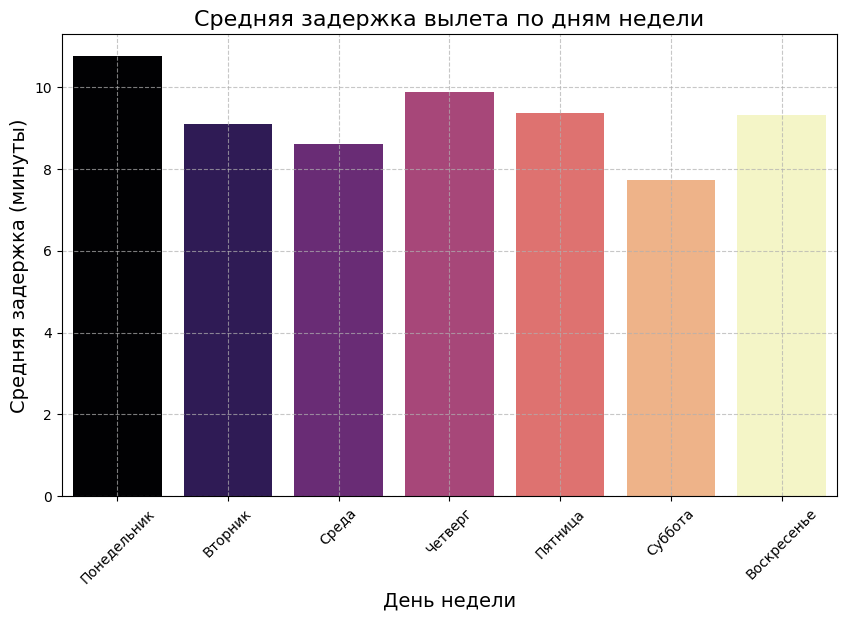


Средняя задержка вылета по дням недели:
DAY_OF_WEEK
1    10.755533
2     9.104848
3     8.597665
4     9.875447
5     9.373953
6     7.734828
7     9.327305
Name: DEPARTURE_DELAY, dtype: float64


In [29]:
# Группировка по дням недели и расчет средней задержки вылета
delay_by_day = flights_clean.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

# Создаем список с названиями дней недели для подписей на графике
days_of_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

# Построение столбчатого графика
plt.figure(figsize=(10, 6))
sns.barplot(
    x=delay_by_day.index,
    y=delay_by_day.values,
    hue = delay_by_day.index,
    palette='magma',
    legend=False
)
plt.title('Средняя задержка вылета по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Средняя задержка (минуты)', fontsize=14)
plt.xticks(range(7), days_of_week, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Вывод средних задержек по дням недели
print("\nСредняя задержка вылета по дням недели:")
print(delay_by_day)

Из графика видим, что задержки в целом скорее зависят не от дня недели. Но наибольшие задержки в понедельник

## Задержки по месяцам

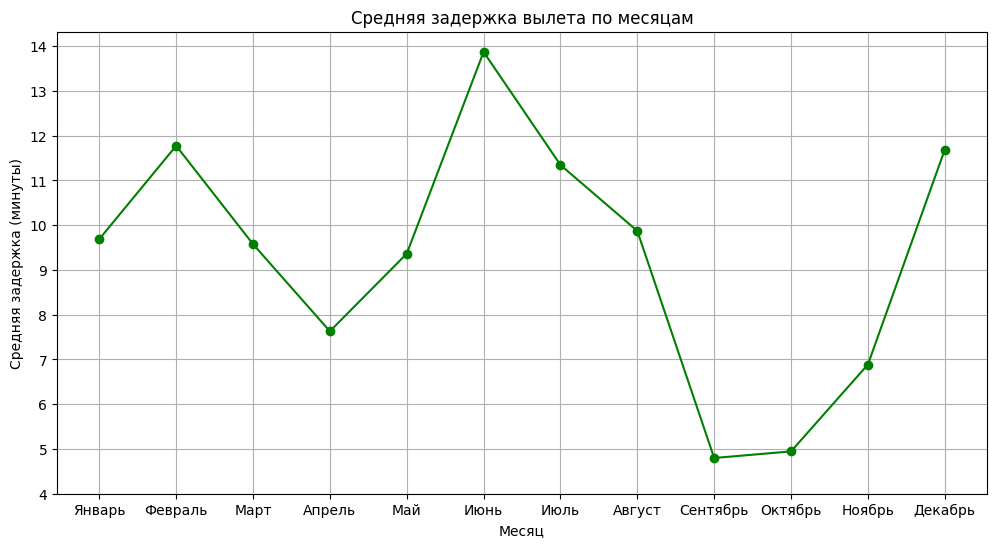

In [32]:
# Группировка по месяцам и расчет средней задержки вылета
delay_by_month = flights_clean.groupby('MONTH')['DEPARTURE_DELAY'].mean()
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

#Построение графика
plt.figure(figsize = (12,6))
delay_by_month.plot(kind='line', marker ='o', color = 'green')
plt.title('Средняя задержка вылета по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(range(1, 13), months)
plt.yticks(range(4,15))
plt.grid(True)
plt.show()

Из графика видим, что наибольшие задержки в июне, что может означать, что в июне наибольшая нагрузка

## Задержки по времени суток

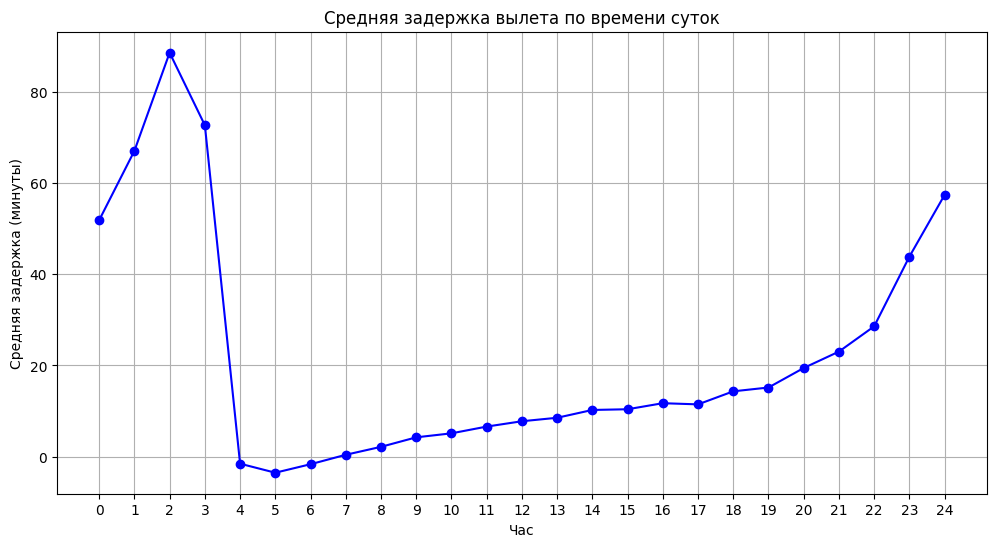

In [35]:
# Группировка по часам и расчет средней задержки вылета
flights['HOUR'] = flights['DEPARTURE_TIME'] // 100
delay_by_hour = flights.groupby('HOUR')['DEPARTURE_DELAY'].mean()

#Построение графика
plt.figure(figsize = (12,6))
delay_by_hour.plot(kind='line', marker ='o', color = 'blue')
plt.xticks(range(0, 25))
plt.title('Средняя задержка вылета по времени суток')
plt.xlabel('Час')
plt.ylabel('Средняя задержка (минуты)')
plt.grid(True)
plt.show()

Задержки вылетов увеличиваются в утренние и вечерние часы, достигая пика в 3 часа ночи, что может быть связано с высокой нагрузкой на аэропорты в эти периоды.

## Задержки по авиакомпаниям


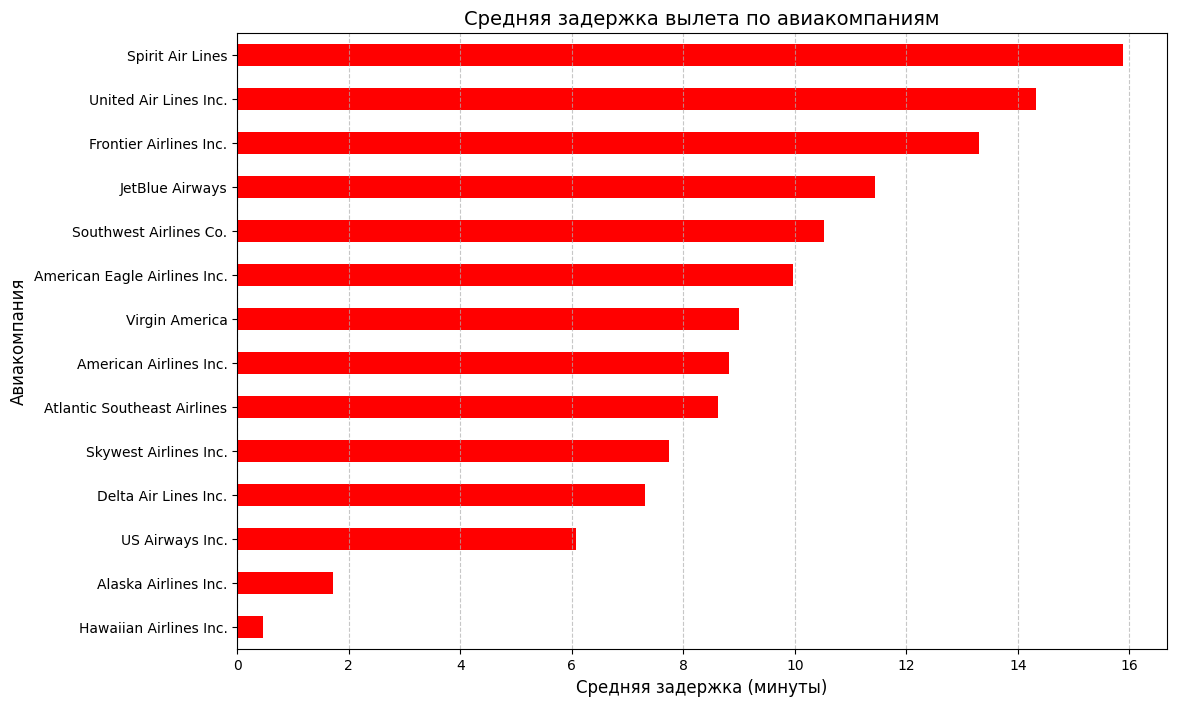

In [46]:
flights_with_airlines = pd.merge(flights_clean, airlines, left_on='AIRLINE', right_on='IATA_CODE')
delay_by_airline = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values()

plt.figure(figsize = (12,8))
delay_by_airline.plot(kind='barh', color='red') 
plt.title('Средняя задержка вылета по авиакомпаниям', fontsize=14)
plt.xlabel('Средняя задержка (минуты)', fontsize=12)
plt.ylabel('Авиакомпания', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Некоторые авиакомпании имеют значительно более высокие средние задержки вылетов, что может указывать на проблемы в их операционной деятельности.

## Задержки по аэропортам

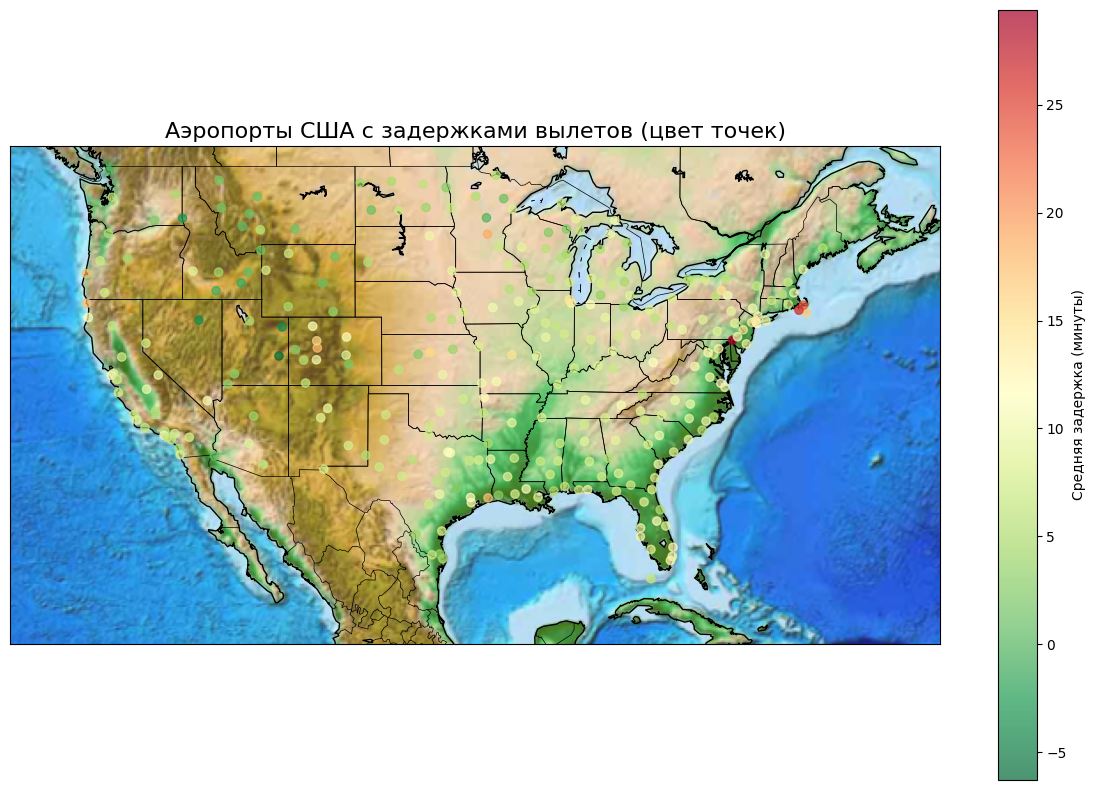

In [88]:
# Группировка данных по аэропортам и расчет средней задержки вылета
delays_by_airport = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()

# Присоединение данных с названиями аэропортов
flights_with_airports = pd.merge(delays_by_airport, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

#Создание карты США
fig = plt.figure(figsize=(15, 10))
land = Basemap(
    projection='merc',
    llcrnrlat=20,  
    urcrnrlat=50,  
    llcrnrlon=-130,  
    urcrnrlon=-60,  
    resolution='l'  )
land.etopo(scale=0.5, alpha=0.9)

# Отображение границ стран, береговых линий и штатов
land.drawcoastlines()
land.drawcountries()
land.drawstates()

# Преобразование координат аэропортов в координаты карты
x, y = land(flights_with_airports['LONGITUDE'].values, flights_with_airports['LATITUDE'].values)

# Отображение аэропортов на карте с цветовой шкалой
scatter = land.scatter(x, y, c=flights_with_airports['DEPARTURE_DELAY'], cmap='RdYlGn_r', alpha=0.7, zorder=5)

# Добавление цветовой легенды
cbar = plt.colorbar(scatter, label='Средняя задержка (минуты)')
plt.title('Аэропорты США с задержками вылетов (цвет точек)', fontsize=16)
plt.show()

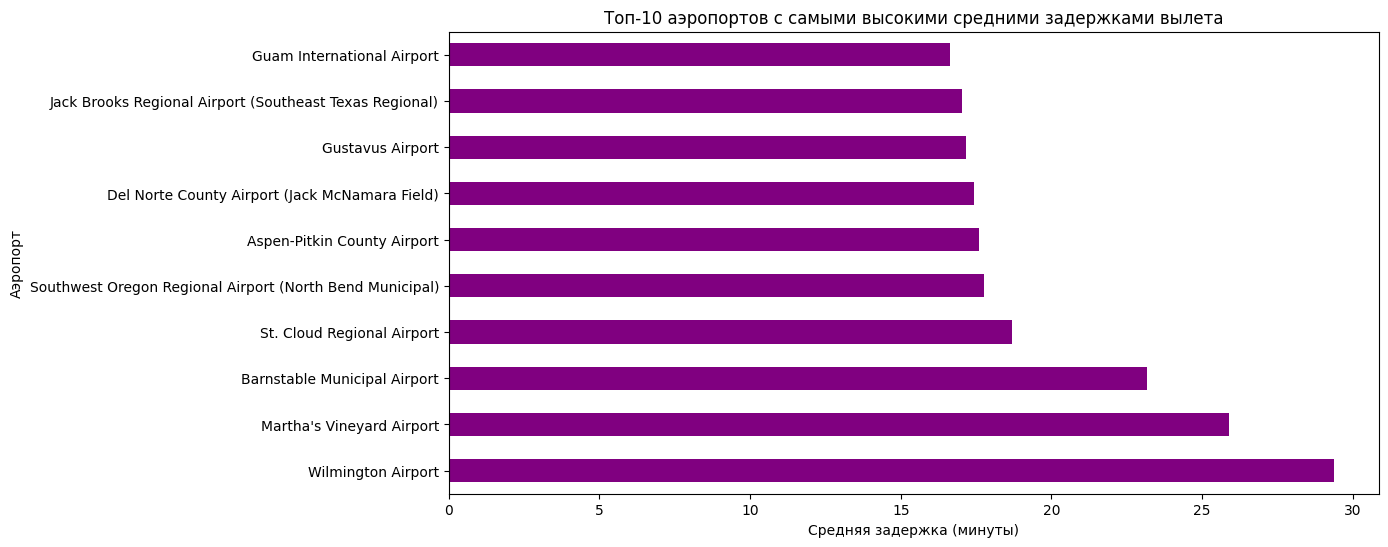

In [89]:
plt.figure(figsize=(12, 6))
delay_by_airport = flights_with_airports.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)
delay_by_airport.plot(kind='barh', color='purple')
plt.title('Топ-10 аэропортов с самыми высокими средними задержками вылета')
plt.ylabel('Аэропорт')
plt.xlabel('Средняя задержка (минуты)')
plt.show()

Благодаря наглядному представлению зависимости средней задержки вылетов от расположения на карте и графике можно сделать выводы в каких регионах и каких аэропортах есть проблемы с организацией и инфраструктурой